In [138]:
library(keras)

In [146]:
idx <- sample(1:nrow(iris), 20)
train <- iris[-idx, ]
test <- iris[idx,]
new.data <- matrix(scale(test[,1:4]), nrow=20, ncol=4)

X <- matrix(scale(train[,1:4]), nrow=130, ncol=4)
Y <- to_categorical(train[,5])
Y <- Y[,2:4]

In [147]:
rm(model)
model <- keras_model_sequential() 

In [148]:
model %>% 
    layer_dense(units = 8, activation = 'relu', input_shape = c(4)) %>% 
    layer_dense(units = 3, activation = 'softmax')

In [149]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_27 (Dense)                    (None, 8)                       40          
________________________________________________________________________________
dense_28 (Dense)                    (None, 3)                       27          
Total params: 67
Trainable params: 67
Non-trainable params: 0
________________________________________________________________________________


In [150]:
model %>% compile(
     loss = 'categorical_crossentropy',
     optimizer = 'adam',
     metrics = 'accuracy'
 )

In [151]:
history <- model %>% fit(
     X, Y, 
     epochs = 200, 
     batch_size = 5, 
     validation_split = 0.2
 )



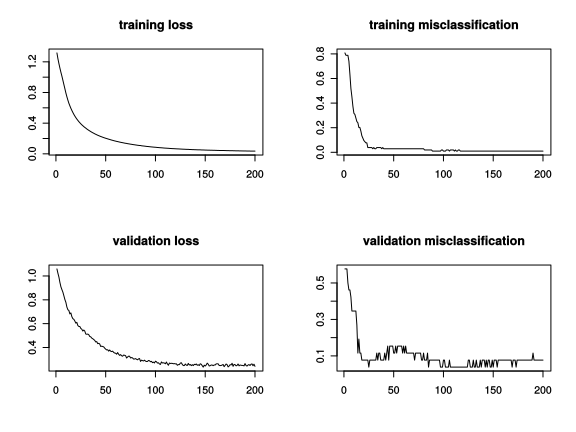

In [152]:
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow=c(2,2))
plot(history$metrics$loss, type="l", xlab="", ylab="", main="training loss")
plot(1-history$metrics$acc, type="l", xlab="", ylab="", main="training misclassification")
plot(history$metrics$val_loss, type="l", xlab="", ylab="", main="validation loss")
plot(1-history$metrics$val_acc, type="l", xlab="", ylab="", main="validation misclassification")

In [153]:
str(history)

List of 2
 $ params :List of 8
  ..$ steps             : NULL
  ..$ metrics           : chr [1:4] "loss" "acc" "val_loss" "val_acc"
  ..$ samples           : int 104
  ..$ verbose           : int 1
  ..$ do_validation     : logi TRUE
  ..$ batch_size        : int 5
  ..$ epochs            : int 200
  ..$ validation_samples: int 26
 $ metrics:List of 4
  ..$ val_acc : num [1:200] 0.423 0.423 0.423 0.5 0.538 ...
  ..$ val_loss: num [1:200] 1.059 1.023 0.991 0.946 0.909 ...
  ..$ acc     : num [1:200] 0.192 0.212 0.212 0.212 0.26 ...
  ..$ loss    : num [1:200] 1.32 1.24 1.18 1.12 1.06 ...
 - attr(*, "class")= chr "keras_training_history"


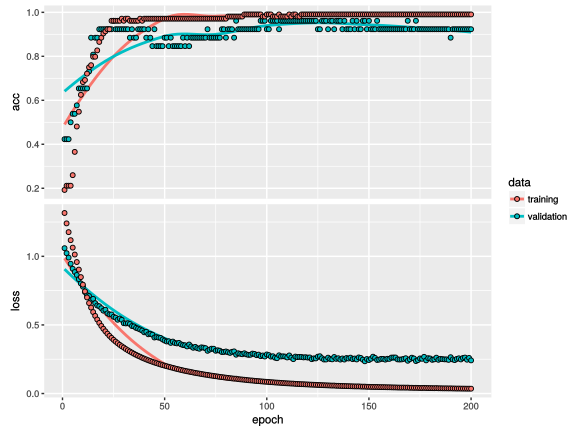

In [154]:
plot(history)

In [155]:
pred <- model %>% 
            predict_classes(new.data, batch_size=64)


In [156]:
table(test$Species, pred)

            pred
             0 1 2
  setosa     8 0 0
  versicolor 0 7 1
  virginica  0 0 4

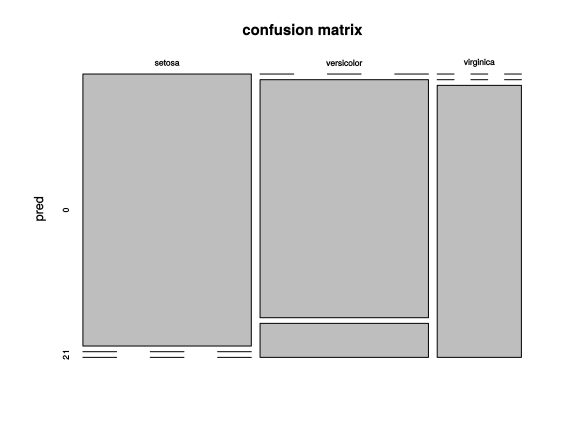

In [157]:
plot(table(test$Species, pred), main="confusion matrix")